# 탐색적 자료 분석(Exploratory Data Analysis)

* 데이터 사이언티스트가 데이터세트를 분석하고 조사하여 주요 특성을 파악하는 데에 사용, 데이터 시각화 방법을 사용함
* 모델의 정규화와 가설 검증 작업을 포함하여 데이터의 종류의 확인과 데이터 간의 관계에 대한 더 나은 이해를 제공하는 데에 사용
* 데이터 분석을 위해 사용할 통계 기법이 적절한지 여부를 판단하는 데에 도움
* 데이터를 살펴보기 전에 정확한 가정이 이루어졌는지를 파악
* 명백한 오류를 제거하고, 데이터 내의 패턴을 더 잘 이해하고, 비정상적이거나 이상한 이벤트를 감지하여 변수 간의 맥락을 찾아내는 데에 중요한 역할을 수행

## 과정
1.분석의 목적과 변수가 무엇이 있는지 확인. 개별 변수의 이름이나 설명을 가지는지 확인  
2.데이터를 전체적으로 살펴보기 : 데이터에 문제가 없는지 확인. head나 tail부분을 확인, 추가적으로 다양한 탐색(이상치, 결측치 등을 확인하는 과정)  
3.데이터의 개별 속성값을 관찰 : 각 속성 값이 예측한 범위와 분포를 갖는지 확인. 만약 그렇지 않다면, 이유가 무엇인지를 확인  
4.속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)

### 데이터 다운로드

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
pd.set_option('display.float_format','{:,.2f}'.format) # 실수를 소수점 2번째 자리까지 표현
pd.set_option('display.max_columns', None) # 모든 컬럼 표시
pd.set_option('display.max_colwidth', -1) # 컬럼내용 전체 표시

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 데이터 구조 확인

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,"452,600.00",NEAR BAY
1,-122.22,37.86,21.00,"7,099.00","1,106.00","2,401.00","1,138.00",8.30,"358,500.00",NEAR BAY
2,-122.24,37.85,52.00,"1,467.00",190.00,496.00,177.00,7.26,"352,100.00",NEAR BAY
3,-122.25,37.85,52.00,"1,274.00",235.00,558.00,219.00,5.64,"341,300.00",NEAR BAY
4,-122.25,37.85,52.00,"1,627.00",280.00,565.00,259.00,3.85,"342,200.00",NEAR BAY


info() : 데이터에 대한 간략한 설명과 전체 행수, 각 특성의 데이터 타입과 null 이 아닌 값을 개수 확인

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity: head() 와 info() 통해 범주형, 카테고리가 있고, 카테고리마다 얼마나 많은 구역 있는지 확인

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND        5   
Name: ocean_proximity, dtype: int64

In [ ]:
housing["ocean_proximity"].mode()

0    <1H OCEAN
dtype: object

descripbe() 숫자형 특성의 요약정보 보여줌

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,433.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,-119.57,35.63,28.64,"2,635.76",537.87,"1,425.48",499.54,3.87,"206,855.82"
std,2.00,2.14,12.59,"2,181.62",421.39,"1,132.46",382.33,1.90,"115,395.62"
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,"14,999.00"
25%,-121.80,33.93,18.00,"1,447.75",296.00,787.00,280.00,2.56,"119,600.00"
50%,-118.49,34.26,29.00,"2,127.00",435.00,"1,166.00",409.00,3.53,"179,700.00"
75%,-118.01,37.71,37.00,"3,148.00",647.00,"1,725.00",605.00,4.74,"264,725.00"
max,-114.31,41.95,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",15.00,"500,001.00"


범주형 변수들의 생김새 확인 

In [ ]:
housing.describe(include = ['category', 'object'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


unique: 종류수, top: 가장 많은 빈도수를 갖는 변수(최빈값), freq: top에 해당하는 변수의 빈도수

#### 변동 계수(CV, Coefficient of Variation, 변동 지수)
표준편차를 평균으로 나눈 것이며, 두 그룹에서 가지고 있는 데이터의 흩어진 정도를 비교하는 경우에 사용  
변동계수가 작은 그룹의 데이터가 더 안정적  
데이터 크기가 서로 다른 경우에도 비교가 가능

In [ ]:
cv1 = np.std(housing['total_rooms'])/np.mean(housing['total_rooms'])

cv2 = np.std(housing['total_bedrooms'])/np.mean(housing['total_bedrooms']) 

print('CV계수 1 : {0}, CV계수 2 : {1} '.format(np.round(cv1, 3), np.round(cv2, 3)))

#format(np.round(cv1, 3))

CV계수 1 : 0.828, CV계수 2 : 0.783 


#### 왜도, 첨도

![confusion_matrix](skewness.png)
![confusion_matrix](kurtosis.png)

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
# 왜도, 첨도 구하기   
def scipy_states(x):
    
    # 왜도
    skewness = skew(x)
    
    # 첨도
    kurto = kurtosis(x)

    return skewness, kurto

skewness, kurto = scipy_states(housing['total_rooms'])

print('왜도: {0}, 첨도: {1}'.format(kurto, skewness))


왜도: 32.6227320729488, 첨도: 4.147042038773343


#### 히스토그램

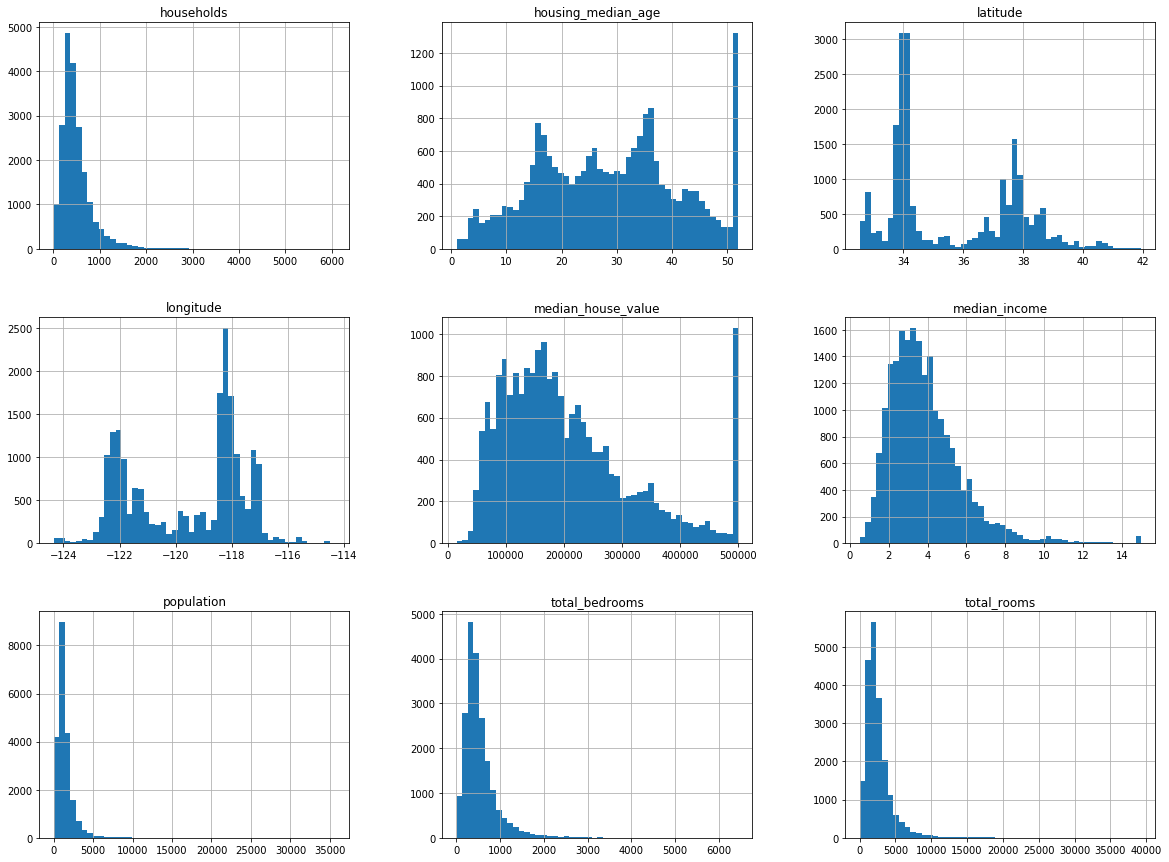

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

* median_income 특성이 us달러로 표현되어 있지 않은 듯, 스케일을 조정하고 상한 15, 하한 0.5로 되도록 만듦(3은 30,000달라)  
* housing_median_age, median_house_value 도 최댓값, 최소값 한정  
* 특성들의 스케일링이 서로 많아 달라서 조정 필요
* 히스토그램의 꼬리가 두꺼워 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만들어, 종 모양의 분포로 변형 시켜야 함

#### 상자수염그림

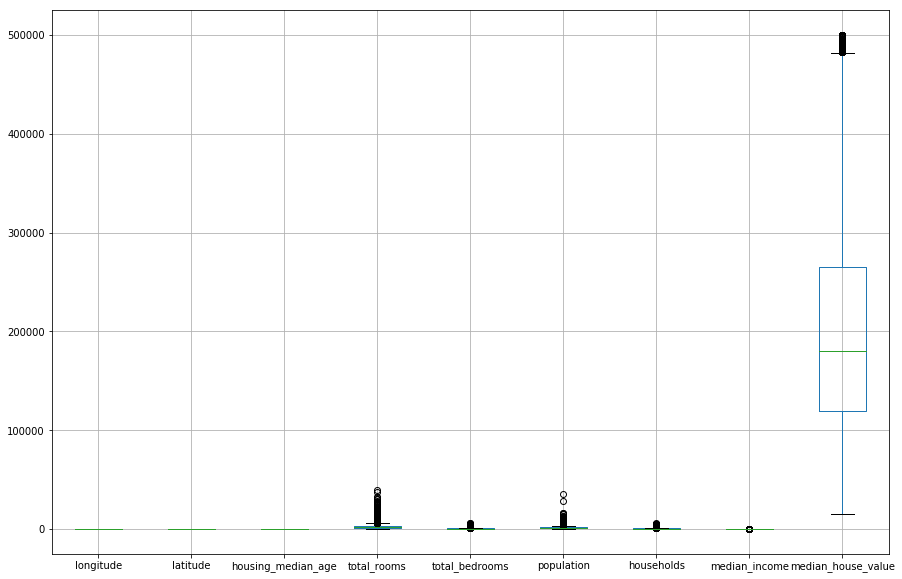

In [ ]:
housing.boxplot(figsize=(15, 10))

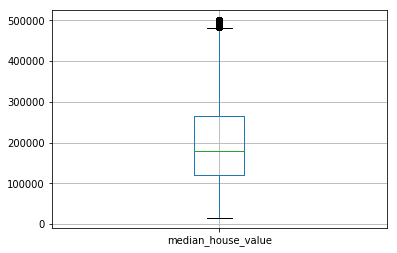

In [ ]:
housing.boxplot(column = 'median_house_value')

In [ ]:
import seaborn as sns

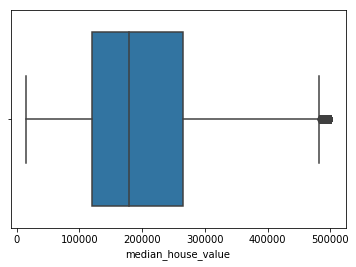

In [ ]:
sns.boxplot(housing['median_house_value'])

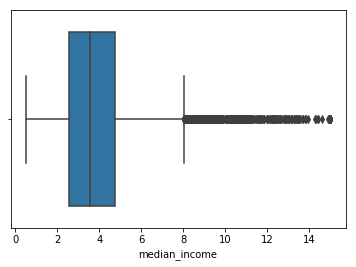

In [ ]:
sns.boxplot(housing['median_income'])

#### pairplot(각 변수들 간의 관계를 한 번에 그려주는 명령어)

ValueError: max must be larger than min in range parameter.

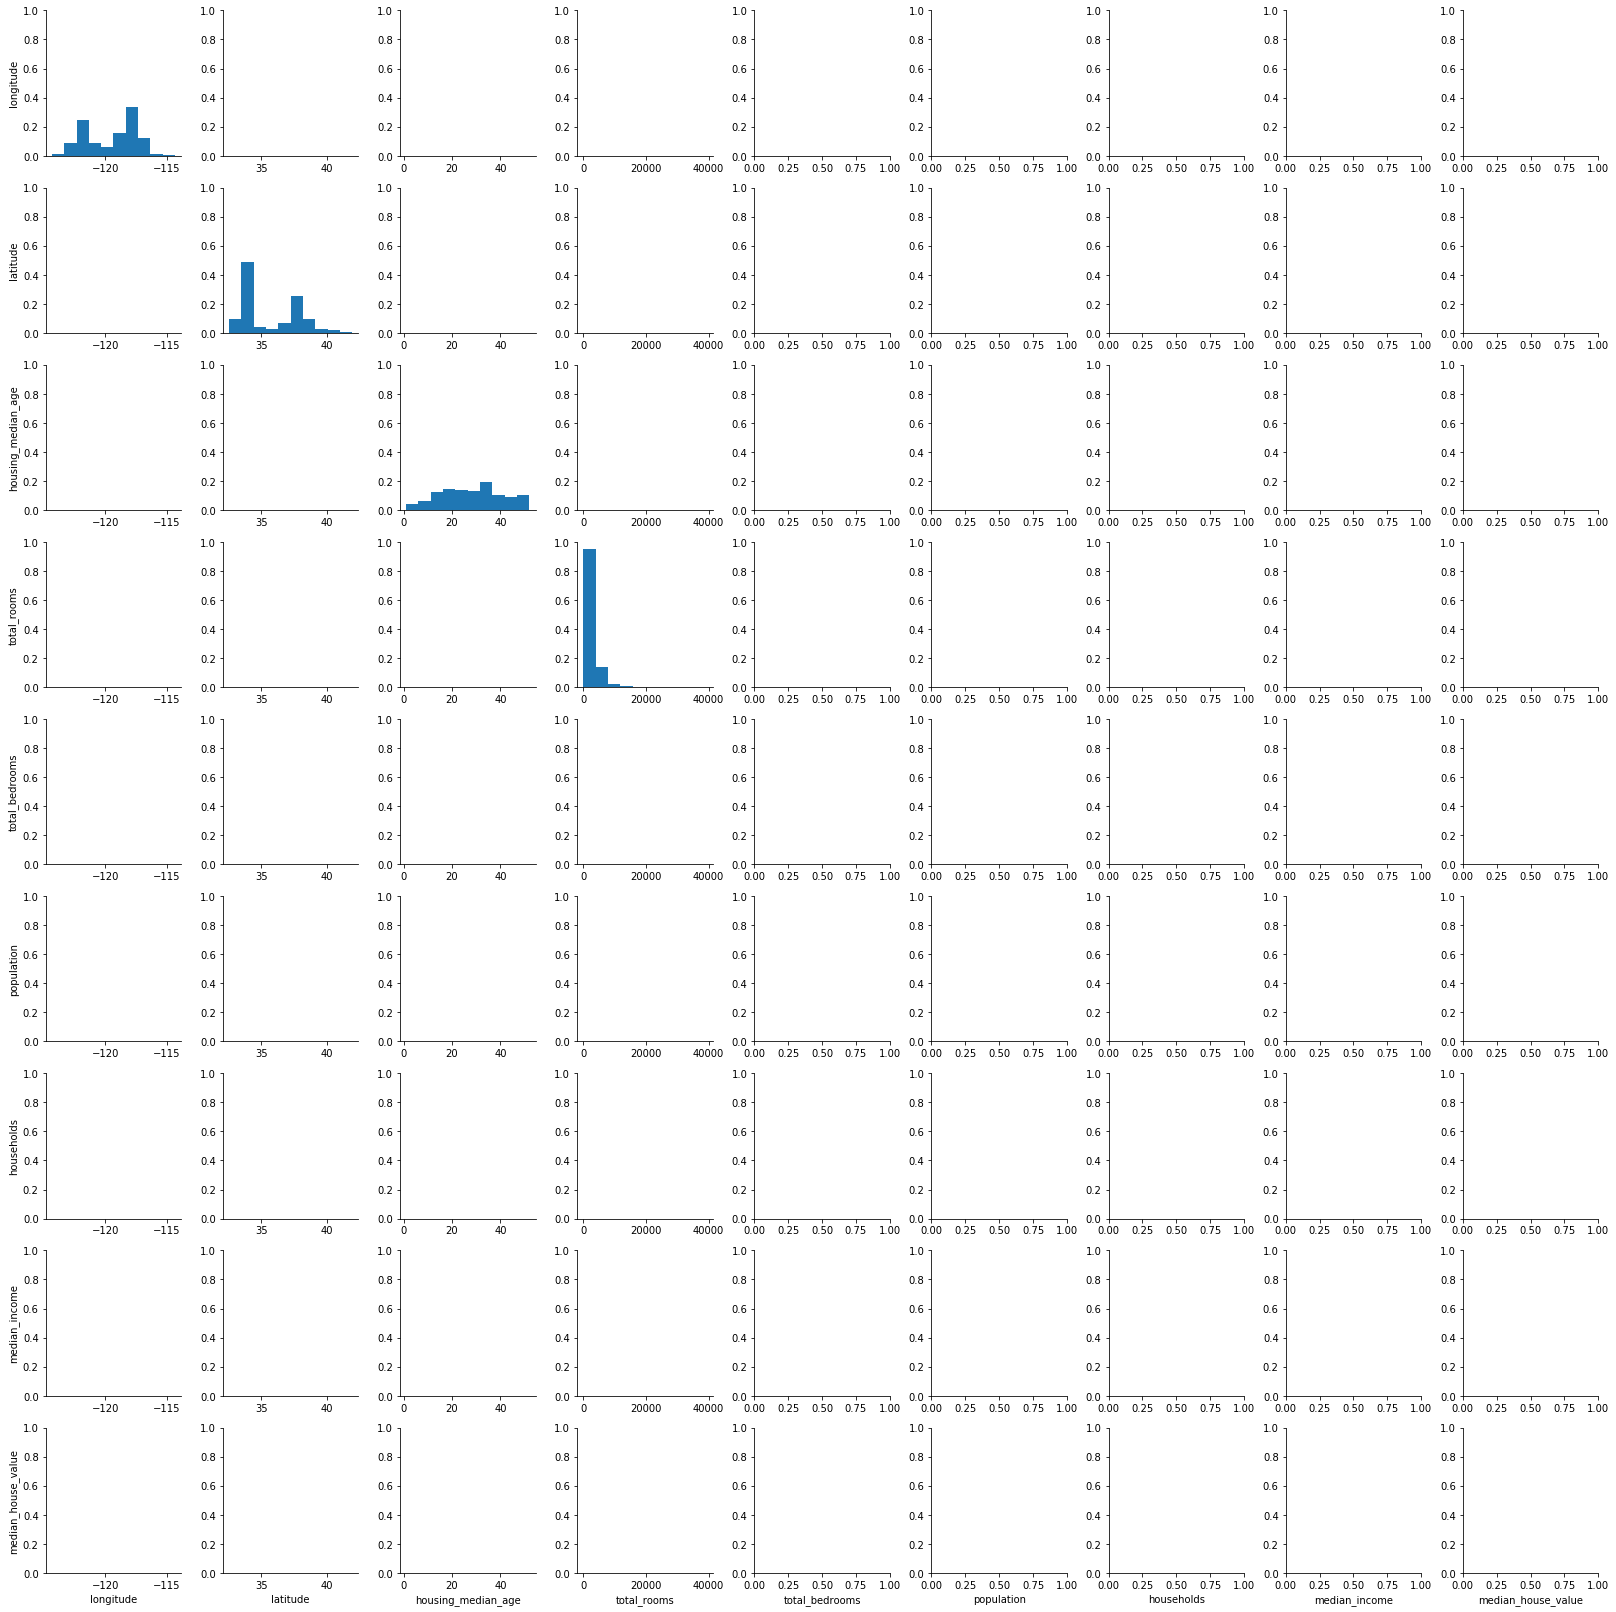

In [ ]:
sns.pairplot(housing)
# 너무 많아 오류남

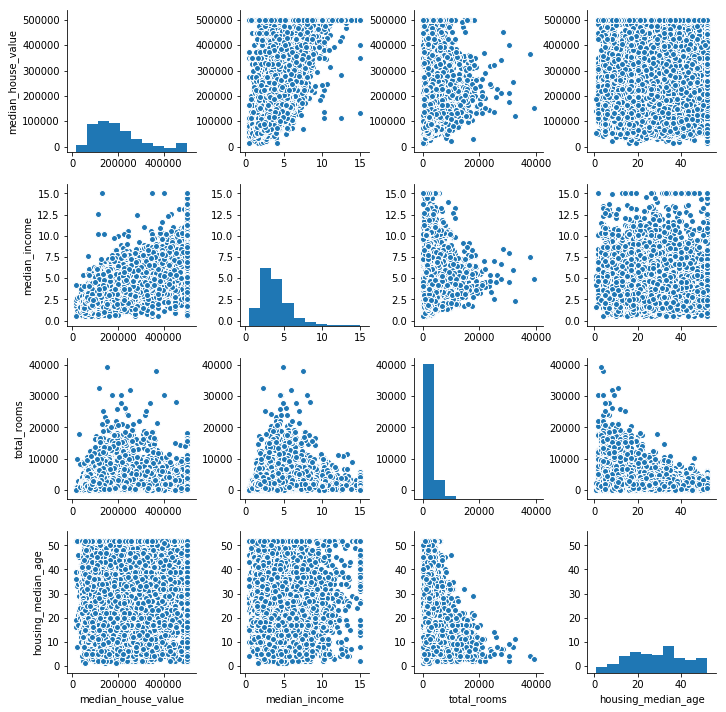

In [ ]:
attributes= ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing[attributes])

#### 산점도

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE3AF93C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE40B3278>]], dtype=object)

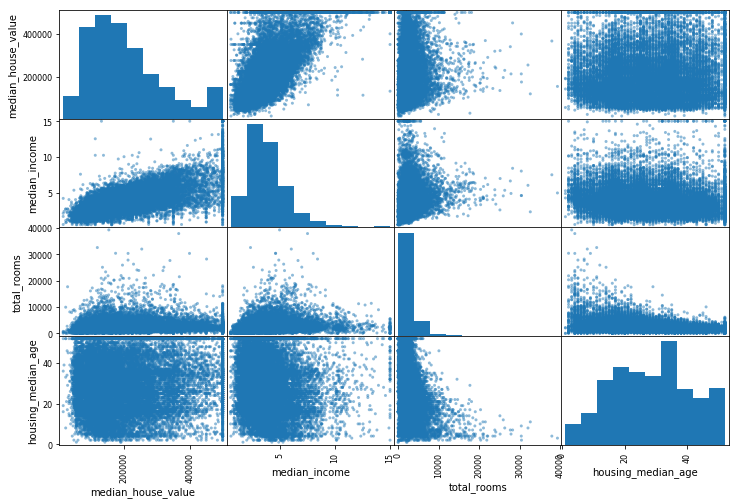

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

#### 지리적 데이터 시각화
지역(경도, 위도)분포 확인 

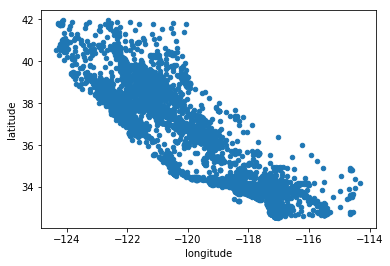

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

밀집된 지역이 잘 부각된 산점도 그리기

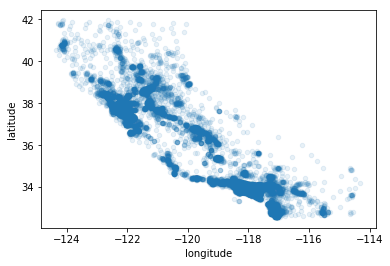

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

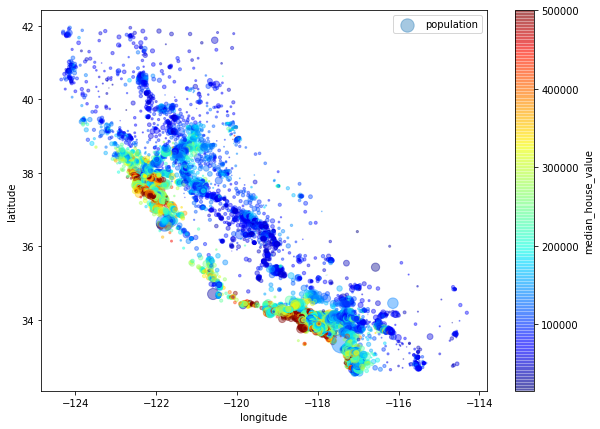

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7), #원의 반지름, 구역의 인구
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, #색상, 가격 / jet - 파란색(낮은 가격)~빨간색(높은 가격)
             sharex=False)
plt.legend()  #범례표시

distplot은 히스토그램과 커널 밀도 그래프를 모두 표시

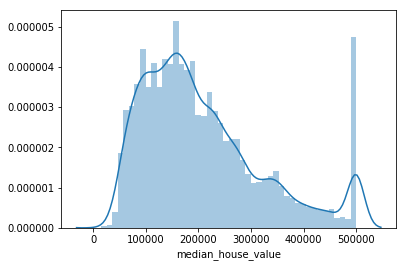

In [ ]:
sns.distplot(housing['median_house_value'])

#### 상관관계
![confusion_matrix](corr.png)
![confusion_matrix](corr2.png)

In [ ]:
corr = housing.corr(method = 'pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00


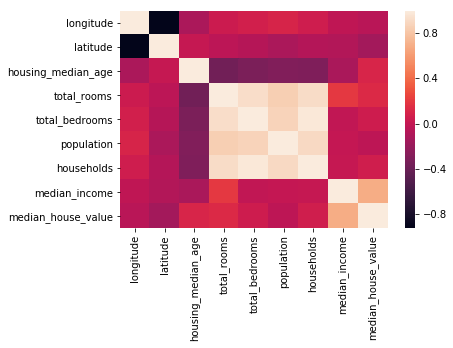

In [ ]:
sns.heatmap(corr)


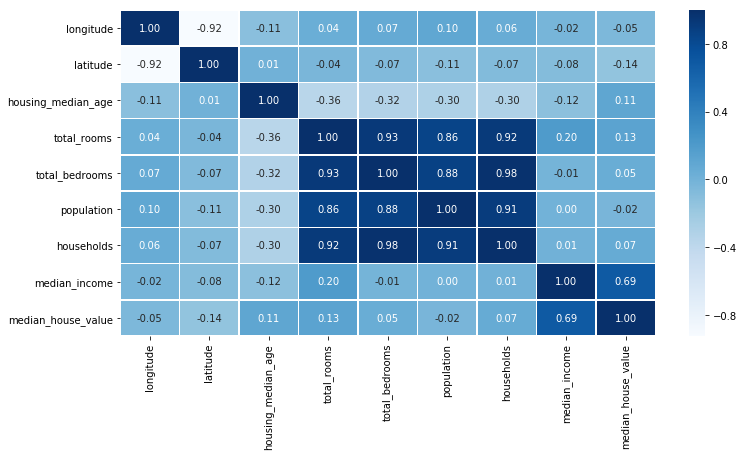

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data = corr, annot = True, fmt = '.2f', linewidth = .5, cmap = 'Blues')

#### 범주형 변수 시각화 

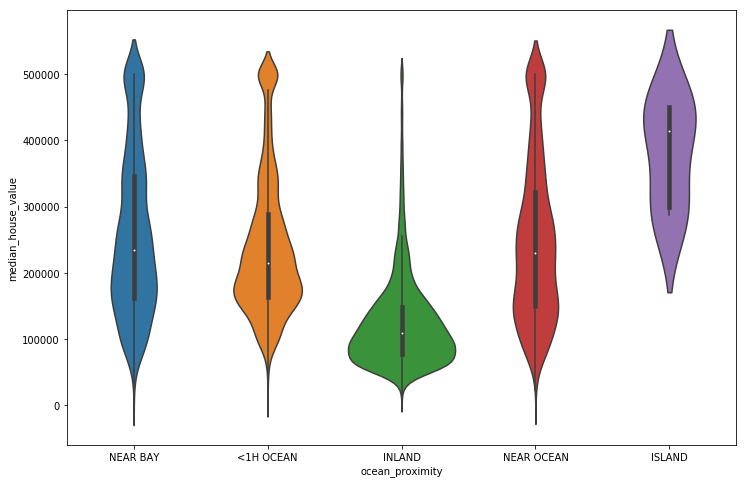

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

#### 줄기,잎 그림

In [ ]:
!pip install stemgraphic

You should consider upgrading via the 'c:\users\ysshin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import stemgraphic

(<matplotlib.figure.Figure at 0x1efe475a8d0>,
 <matplotlib.axes._axes.Axes at 0x1efe4c2fa20>)

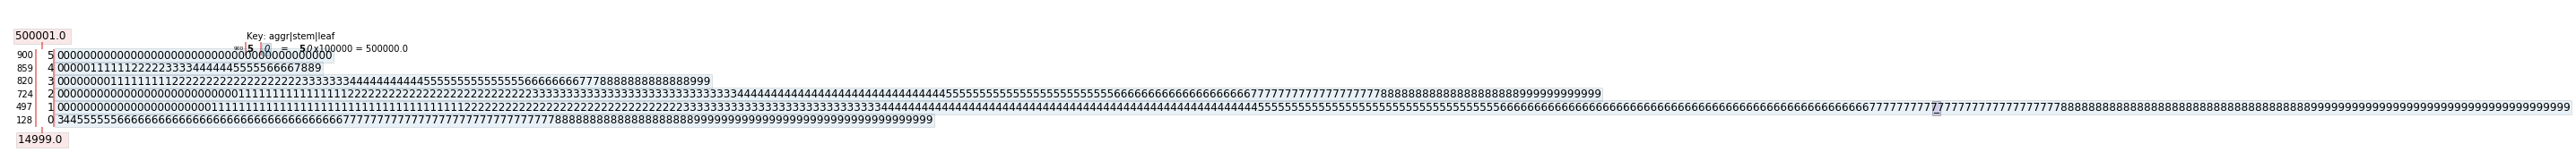

In [ ]:
stemgraphic.stem_graphic(housing.median_house_value, scale=100000)

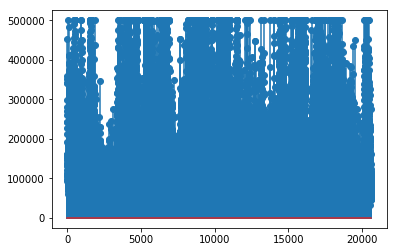

In [ ]:
#시간 오래걸림

fig, ax = plt.subplots()
plt.stem(housing['median_house_value'])

plt.show()